In [ ]:
#Claudia Shi
#Js5334

In [47]:
#Import relevant libraries & dependencies for all three problems
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.layers import Dense, Dropout
import tensorflow.examples.tutorials.mnist.input_data as input_data


In [2]:
#Problem 1
#This is the example given
label = tf.constant(1.0, dtype=tf.float32)
x = tf.placeholder(tf.float32)

loss_mse = tf.losses.mean_squared_error(label, x)
gradient_mse = tf.gradients(loss_mse, x)

with tf.Session() as sess:
    ci, gi = sess.run((loss_mse, gradient_mse), feed_dict={x: 1.0})
    print("mse, loss, grad = ", ci, gi)

mse, loss, grad =  0.0 [0.0]


In [3]:
#Problem 1.1
loss_hinge = tf.losses.hinge_loss(1,x)
gradient_hinge = tf.gradients(loss_hinge, x)

with tf.Session() as sess:
    ci, gi = sess.run((loss_hinge, gradient_hinge), feed_dict={x: 1.001})
    print("hinge loss, loss, grad = ", ci, gi)

hinge loss, loss, grad =  0.0 [-0.0]


In [4]:
#Problem 1.2 
with tf.Session() as sess:
    ci, gi = sess.run((loss_hinge, gradient_hinge), feed_dict={x: 0.009})
    print("hinge loss, loss, grad = ", ci, gi)

hinge loss, loss, grad =  0.991 [-1.0]


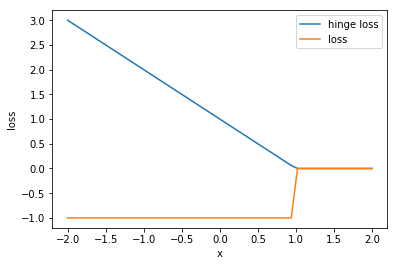

In [6]:
#Problem 1.3
with tf.Session() as sess: 
    arr = np.linspace(-2,2,50)
    ci_arr = []
    gi_arr = []
    for i in arr:
        ci, gi = sess.run((loss_hinge, gradient_hinge), feed_dict={x: i})
        ci_arr.append(ci)
        gi_arr.append(gi)
        #print("hinge loss, loss, grad = ", ci, gi)
    plt.plot(arr,ci_arr,label="hinge loss")
    plt.plot(arr, gi_arr, label="loss")
    plt.xlabel("x")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

In [8]:
#Problem 2
#Logistic regression and multi-layer perceptrons (MLPs) are two basic models for classification tasks. 
#Try to use these two models to learn from the following xor dataset:
#Problem setup
xs = np.array([[-1.1, 1.0], [-1.0, 1.1], [-1.1, 1.1], [1.0, -1.1],[1.1, -1.0],[1.0, -1.0],
                  [1.1, 1.1],[1.0, 0.9],[1.1, 1.0],  [-1.1, -1.0], [-1.1, -1.1], [-1.0, -1.1]],
                dtype=np.float32)
ys = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=np.float32)
ys = ys[:, None]
ys = tf.keras.utils.to_categorical(ys,2)
split = 4 * len(ys) // 5

xs = xs[:split]
ys = ys[:split]
xs_test = xs[split:]
ys_test = ys[split:]


In [9]:

def logistic_regression(xs, ys, xs_test, ys_test):
#we have two classes 
    n_epochs = 50
    
    model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid')
            ])
   
    model.compile(optimizer='sgd', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(xs, ys, epochs=n_epochs)
    model.evaluate(xs_test, ys_test)
    print (model.predict(xs).round())

    return

In [10]:
logistic_regression(xs, ys, xs_test, ys_test)

Epoch 1/50
9/9 [==============================] - 0s 23ms/step - loss: 0.7919 - acc: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 168us/step - loss: 0.7912 - acc: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 295us/step - loss: 0.7904 - acc: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 209us/step - loss: 0.7897 - acc: 0.5000
Epoch 5/50
9/9 [==============================] - 0s 188us/step - loss: 0.7890 - acc: 0.5000
Epoch 6/50
9/9 [==============================] - 0s 250us/step - loss: 0.7883 - acc: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 152us/step - loss: 0.7876 - acc: 0.5000
Epoch 8/50
9/9 [==============================] - 0s 492us/step - loss: 0.7869 - acc: 0.5000
Epoch 9/50
9/9 [==============================] - 0s 459us/step - loss: 0.7861 - acc: 0.5000
Epoch 10/50
9/9 [==============================] - 0s 199us/step - loss: 0.7854 - acc: 0.5000
Epoch 11/50
9/9 [==============================] - 0s 842us/step - los

In [11]:
def mlp(xs, ys, xs_test, ys_test):
    n_hidden1 = 16
    n_hidden2 = 16
    n_epochs = 50
    
    model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(n_hidden1, input_dim=2),
                tf.keras.layers.Dense(n_hidden2, input_dim=n_hidden1),
                tf.keras.layers.Dense(2, input_dim=n_hidden2, activation='softmax')
            ])
   
    model.compile(optimizer='sgd', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(xs, ys, epochs=n_epochs)
    model.evaluate(xs_test, ys_test)
    print (model.predict(xs).round())
    return

In [12]:
mlp(xs, ys, xs_test, ys_test)

Performing Multi-Layer Perceptron
Epoch 1/50
9/9 [==============================] - 0s 27ms/step - loss: 0.5442 - acc: 0.6667
Epoch 2/50
9/9 [==============================] - 0s 332us/step - loss: 0.5349 - acc: 0.6667
Epoch 3/50
9/9 [==============================] - 0s 274us/step - loss: 0.5258 - acc: 0.6667
Epoch 4/50
9/9 [==============================] - 0s 299us/step - loss: 0.5171 - acc: 0.6667
Epoch 5/50
9/9 [==============================] - 0s 253us/step - loss: 0.5086 - acc: 0.6667
Epoch 6/50
9/9 [==============================] - 0s 221us/step - loss: 0.5004 - acc: 0.6667
Epoch 7/50
9/9 [==============================] - 0s 210us/step - loss: 0.4925 - acc: 0.7778
Epoch 8/50
9/9 [==============================] - 0s 351us/step - loss: 0.4847 - acc: 0.7778
Epoch 9/50
9/9 [==============================] - 0s 248us/step - loss: 0.4772 - acc: 0.8889
Epoch 10/50
9/9 [==============================] - 0s 241us/step - loss: 0.4699 - acc: 0.8889
Epoch 11/50
9/9 [===================

In [ ]:
#As we can see, the logistic regression has its accuracy bounded at 0.5
#This is not suprising because no linear separater can separate XOR
#MLP on the other hand can solve this problem because it is not a linear separator. 

In [28]:
#Problem 3
#Now we write a function that would retrive the data. 

def get_data(val):
    batch_size = 50000
    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    xs, ys = mnist.train.next_batch(batch_size)

    index = [index for index,y in enumerate(ys) if len(np.where((y==val)==False)[0])==0]
    xs = xs[index]
    ys = ys[index]
    xs_test, ys_test = mnist.test.next_batch(batch_size)

    
    index_test = [index for index,y in enumerate(ys_test) if len(np.where((y==val)==False)[0])==0]
    
    xs_test = xs_test[index_test]
    ys_test = ys_test[index_test]

    return (xs, ys), (xs_test, ys_test)





In [31]:
def reshape_the_data():
    four = [0.,0.,0.,1.,0.,0.,0.,0.,0.,0.]
    eight = [0.,0.,0.,0.,0.,0.,0.,1.,0.,0.]
    
    (xs4,ys4),(xs_test4,ys_test4) = get_data(four)
    (xs8,ys8),(xs_test8,ys_test8) = get_data(eight)
    
    xs = np.array(np.concatenate((xs4,xs8),axis=0))
    ys = np.array(np.concatenate((ys4,ys8),axis=0))
    xs_test = np.array(np.concatenate((xs_test4,xs_test8),axis=0))
    ys_test = np.array(np.concatenate((ys_test4,ys_test8),axis=0))
    
    return (xs,ys),(xs_test,ys_test)




In [33]:
(xs,ys),(xs_test,ys_test) = reshape_the_data()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(50000, 784)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(50000, 784)
(5140, 784)


In [36]:
#Problem One hidden layer MLP with cross entropy loss
def MLP_CROSSENTROPY(xs, ys, xs_test, ys_test):
    n_samples = xs.shape[0]
    n_inputs = xs.shape[1]
    n_hidden1 = 32
    n_classes = ys.shape[1]
    n_epochs = 20
    
    model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(n_hidden1, input_dim=n_inputs),
                tf.keras.layers.Dense(n_classes, input_dim=n_hidden1, activation='softmax')
            ])
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(xs, ys, epochs=n_epochs)
    model.evaluate(xs_test, ys_test)
    print(model.predict(xs).round())

    return


In [37]:
MLP_CROSSENTROPY(xs, ys, xs_test, ys_test)

Epoch 1/20
10331/10331 [==============================] - 1s 83us/step - loss: 0.0847 - acc: 0.9770
Epoch 2/20
10331/10331 [==============================] - 1s 64us/step - loss: 0.0368 - acc: 0.9891
Epoch 3/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0347 - acc: 0.9896
Epoch 4/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0326 - acc: 0.9905
Epoch 5/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0314 - acc: 0.9902
Epoch 6/20
10331/10331 [==============================] - 1s 57us/step - loss: 0.0302 - acc: 0.9918
Epoch 7/20
10331/10331 [==============================] - 1s 57us/step - loss: 0.0294 - acc: 0.9908
Epoch 8/20
10331/10331 [==============================] - 1s 57us/step - loss: 0.0286 - acc: 0.9911
Epoch 9/20
10331/10331 [==============================] - 1s 60us/step - loss: 0.0274 - acc: 0.9920
Epoch 10/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0270 - acc: 0.9912

In [38]:
#problem 2
#One hidden layer MLP with hinge loss
#same exact as the previous one, except 
def MLP_hingeloss(xs, ys, xs_test, ys_test):
    n_samples = xs.shape[0]
    n_inputs = xs.shape[1]
    n_hidden1 = 32
    n_classes = ys.shape[1]
    n_epochs = 20
    
    model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(n_hidden1, input_dim=n_inputs),
                tf.keras.layers.Dense(n_classes, input_dim=n_hidden1, activation='softmax')
            ])
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
                  loss='categorical_hinge',
                  metrics=['accuracy'])

    model.fit(xs, ys, epochs=n_epochs)
    model.evaluate(xs_test, ys_test)
    print(model.predict(xs).round())
    return


In [39]:
MLP_hingeloss(xs, ys, xs_test, ys_test)

Epoch 1/20
10331/10331 [==============================] - 1s 111us/step - loss: 0.0621 - acc: 0.9802
Epoch 2/20
10331/10331 [==============================] - 1s 80us/step - loss: 0.0265 - acc: 0.9883
Epoch 3/20
10331/10331 [==============================] - 1s 66us/step - loss: 0.0234 - acc: 0.9893
Epoch 4/20
10331/10331 [==============================] - 1s 65us/step - loss: 0.0212 - acc: 0.9902
Epoch 5/20
10331/10331 [==============================] - 1s 63us/step - loss: 0.0204 - acc: 0.9911
Epoch 6/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0180 - acc: 0.9916
Epoch 7/20
10331/10331 [==============================] - 1s 57us/step - loss: 0.0181 - acc: 0.9915
Epoch 8/20
10331/10331 [==============================] - 1s 58us/step - loss: 0.0165 - acc: 0.9924
Epoch 9/20
10331/10331 [==============================] - 1s 74us/step - loss: 0.0162 - acc: 0.9923
Epoch 10/20
10331/10331 [==============================] - 1s 65us/step - loss: 0.0150 - acc: 0.993

In [ ]:
#As we compare these two models. We see that they both perform exceeding well.
#Hinge loss performed slightly better than crossentropy loss. 
#could be that hinge loss better model the problem 

In [56]:
#Bonus problem
#MLP with two and three hidden layers
def MLP_Multilayer(xs, ys, xs_test, ys_test):
    n_samples = xs.shape[0]
    n_inputs = xs.shape[1]
    n_hidden1 = 32
    n_hidden2 = 32
    n_hidden3 = 8
    n_classes = ys.shape[1]
    n_epochs = 20
    
    model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(n_hidden1, input_dim=n_inputs),
                tf.keras.layers.Dense(n_hidden2, input_dim= n_hidden1),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(n_hidden3, activation='relu'),
                tf.keras.layers.Dropout(0.2),  
                tf.keras.layers.Dense(n_classes, activation='softmax')
            ])
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
                  loss='categorical_hinge',
                  metrics=['accuracy'])

    model.fit(xs, ys, epochs=n_epochs)
    model.evaluate(xs_test, ys_test)
    print(model.predict(xs).round())
    return

In [57]:
MLP_Multilayer(xs, ys, xs_test, ys_test)

Epoch 1/20
10331/10331 [==============================] - 1s 126us/step - loss: 0.1443 - acc: 0.9441
Epoch 2/20
10331/10331 [==============================] - 1s 89us/step - loss: 0.0524 - acc: 0.9835
Epoch 3/20
10331/10331 [==============================] - 1s 110us/step - loss: 0.0489 - acc: 0.9860
Epoch 4/20
10331/10331 [==============================] - 1s 89us/step - loss: 0.0436 - acc: 0.9871
Epoch 5/20
10331/10331 [==============================] - 1s 83us/step - loss: 0.0384 - acc: 0.9895
Epoch 6/20
10331/10331 [==============================] - 1s 81us/step - loss: 0.0360 - acc: 0.9894
Epoch 7/20
10331/10331 [==============================] - 1s 86us/step - loss: 0.0329 - acc: 0.9894
Epoch 8/20
10331/10331 [==============================] - 1s 75us/step - loss: 0.0305 - acc: 0.9897
Epoch 9/20
10331/10331 [==============================] - 1s 73us/step - loss: 0.0285 - acc: 0.9894
Epoch 10/20
10331/10331 [==============================] - 1s 72us/step - loss: 0.0261 - acc: 0.99

In [ ]:
#It is interesting to observe that despite having a much more complex structure. 
#The model performed not as well as the two simplex models earlier. 
#This could be a result from overfitting